In [153]:
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np

image = cv.imread('beans.jpg')
image_gray = cv.imread('beans.jpg', cv.IMREAD_GRAYSCALE)
blur = cv.GaussianBlur(image_gray, (5,5), 0)
edged = cv.Canny(blur, 10, 250)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7,7))
closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)
contours, _ = cv.findContours(closed.copy(),cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
total = 0
# cv.imshow('closed', closed)
cv.waitKey(0)


-1

In [154]:
image.shape

(205, 321, 3)

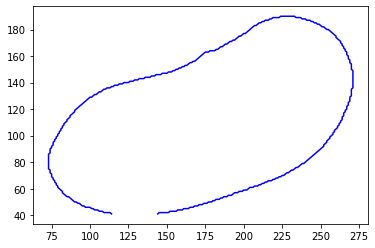

In [155]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

In [156]:
import cv2
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 19092.5,
 'm10': 3365383.6666666665,
 'm01': 2088452.1666666665,
 'm20': 642815949.9166666,
 'm11': 385767222.5416666,
 'm02': 252310720.41666666,
 'm30': 130530556423.40001,
 'm21': 76553833016.06667,
 'm12': 48481116549.63333,
 'm03': 32942317934.45,
 'mu20': 49608814.975366354,
 'mu11': 17641371.536580324,
 'mu02': 23863295.906796604,
 'mu30': -265708591.8646698,
 'mu21': 19574504.873002052,
 'mu12': 147545847.4080906,
 'mu03': 122437101.23646545,
 'nu20': 0.13609220618198759,
 'nu11': 0.048395696887367674,
 'nu02': 0.06546434516410378,
 'nu30': -0.005275317457121361,
 'nu21': 0.0003886277314045153,
 'nu12': 0.002929341422855054,
 'nu03': 0.002430838133683789}

In [115]:
area = cv2.contourArea(c0)
area

29352.0

In [116]:
perimeter = cv2.arcLength(c0,True)
perimeter

818.8082183599472

In [117]:
(x,y),(MinorAxis, MajorAxis), angle = cv2.fitEllipse(c0)

In [118]:
(x,y)

(1116.9761962890625, 2399.9130859375)

In [119]:
(MajorAxis, MinorAxis)

(251.02186584472656, 153.57998657226562)

In [120]:
AspectRation = MajorAxis/MinorAxis
AspectRation

1.6344699035808976

In [121]:
Eccentricity = (((MajorAxis*MajorAxis) - (MinorAxis*MinorAxis))**(1/2))/MajorAxis
Eccentricity

0.7909976725900176

In [122]:
ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(image, ellipse, 10)
blur1 = cv.GaussianBlur(img4, (5,5), 0)
edged1 = cv.Canny(blur1, 10, 250)
kernel1 = cv.getStructuringElement(cv.MORPH_RECT, (7,7))
closed1 = cv.morphologyEx(edged1, cv.MORPH_CLOSE, kernel1)
contours1, _ = cv.findContours(closed1.copy(),cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
ConvexArea = cv2.contourArea(contours1[0])
ConvexArea

31455.0

In [123]:
from math import pi
EquivDiameter = (4*area/pi)**(1/2)
EquivDiameter

193.3187190032732

In [124]:
#Extent

In [125]:
Solidity = area / ConvexArea
Solidity

0.9331425846447305

In [126]:
roundness = (4*pi*area)/(perimeter*perimeter)
roundness

0.5501526088394494

In [127]:
Compactness = EquivDiameter/MajorAxis
Compactness

0.7701270100623564

In [128]:
ShapeFactor1 = MajorAxis/area
ShapeFactor1

0.008552121349302486

In [129]:
ShapeFactor2 = MinorAxis/area
ShapeFactor2

0.005232351682075007

In [130]:
ShapeFactor3 = area/((MajorAxis/2)*(MajorAxis/2)*pi)
ShapeFactor3

0.5930956116275846

In [131]:
ShapeFactor4 = area/((MajorAxis/2)*(MinorAxis/2)*pi)
ShapeFactor4

0.9693969271511919

In [132]:
# Class

In [133]:
import pandas as pd

df = pd.DataFrame=({
    'Area' : area,
    'Perimeter' : perimeter,
    'MajorAxisLength' : MajorAxis,
    'MinorAxisLength' : MinorAxis,
    'AspectRation' : AspectRation,
    'Eccentricity' : Eccentricity,
    'ConvexArea' : ConvexArea,
    'EquivDiameter' : EquivDiameter,
    'Extent' : 0.7,
    'Solidity': Solidity,
    'roundness': roundness,
    'Compactness': Compactness,
    'ShapeFactor1': ShapeFactor1,
    'ShapeFactor2':ShapeFactor2,
    'ShapeFactor3':ShapeFactor3,
    'ShapeFactor4':ShapeFactor4,
    'Class' : 'Barbunya'
})

In [134]:
df

{'Area': 29352.0,
 'Perimeter': 818.8082183599472,
 'MajorAxisLength': 251.02186584472656,
 'MinorAxisLength': 153.57998657226562,
 'AspectRation': 1.6344699035808976,
 'Eccentricity': 0.7909976725900176,
 'ConvexArea': 31455.0,
 'EquivDiameter': 193.3187190032732,
 'Extent': 0.7,
 'Solidity': 0.9331425846447305,
 'roundness': 0.5501526088394494,
 'Compactness': 0.7701270100623564,
 'ShapeFactor1': 0.008552121349302486,
 'ShapeFactor2': 0.005232351682075007,
 'ShapeFactor3': 0.5930956116275846,
 'ShapeFactor4': 0.9693969271511919,
 'Class': 'Barbunya'}

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

y = df_all[['Class']]
X = df_all.drop("Class",axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

svmClf = svm.SVC(kernel='linear',gamma='auto', C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM')
plt.show()  

TypeError: unhashable type: 'list'

In [80]:
df['Class'][5710]

'HOROZ'

In [68]:
df['Extent']

0        0.763923
1        0.783968
2        0.778113
3        0.782681
4        0.773098
5        0.775688
6        0.762402
7        0.770682
8        0.771561
9        0.783683
10       0.770805
11       0.786377
12       0.761046
13       0.798759
14       0.781313
15       0.764110
16       0.779193
17       0.762984
18       0.770322
19       0.774277
20       0.769197
21       0.768949
22       0.756965
23       0.761823
24       0.740936
25       0.773184
26       0.777111
27       0.775590
28       0.777674
29       0.773877
30       0.772354
31       0.774848
32       0.785246
33       0.777656
34       0.772271
35       0.774212
36       0.789741
37       0.761881
38       0.779449
39       0.770515
40       0.778069
41       0.779805
42       0.780879
43       0.767625
44       0.760671
45       0.760593
46       0.762907
47       0.754432
48       0.775204
49       0.764061
50       0.775806
51       0.781314
52       0.790184
53       0.784844
54       0.782491
55       0

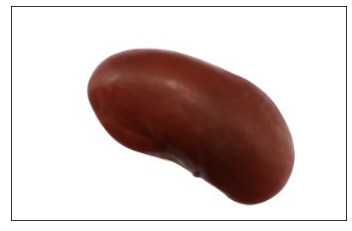

In [2]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
cv2.imshow('image', image)
cv2.imshow('image_gray', image_gray)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [4]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
#ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('beans.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 18993.0, 'm10': 3344103.1666666665, 'm01': 2082781.8333333333, 'm20': 637861170.0, 'm11': 384205550.5, 'm02': 252079128.66666666, 'm30': 129319103191.05, 'm21': 76129223178.16667, 'm12': 48370731408.26666, 'm03': 32961230980.25, 'mu20': 49063929.474015355, 'mu11': 17489532.792117894, 'mu02': 23680236.16609481, 'mu30': -266704334.7244568, 'mu21': 22275299.894208908, 'mu12': 151262405.4448099, 'mu03': 124535295.47140884, 'nu20': 0.13601136241512748, 'nu11': 0.04848317712342672, 'nu02': 0.06564458284916379, 'nu30': -0.005364708806830356, 'nu21': 0.00044806357437238766, 'nu12': 0.0030426155595501955, 'nu03': 0.002505004641439085}


(-0.5, 320.5, 204.5, -0.5)

C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eeot2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50896 missing from c

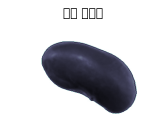

In [10]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

In [2]:
img_raw = img.astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw
img = img_raw.copy().astype('uint8')
contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [20]:
contours[0].shape

(4, 1, 2)

In [21]:
np.squeeze(contours[0])[:5]

array([[  0,   0],
       [  0, 204],
       [320, 204],
       [320,   0]], dtype=int32)

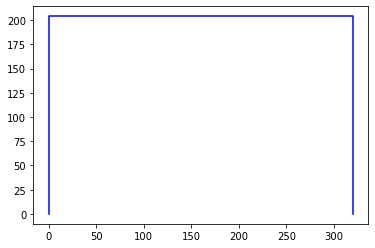

In [22]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

In [23]:
cv2.imshow('closed', img_raw)

In [9]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [10]:
cx

176

In [11]:
cy

109

In [12]:
area = cv2.contourArea(cnt)

In [13]:
area

18993.0

In [16]:
perimeter = cv2.arcLength(cnt,True)

In [17]:
perimeter

573.8132697343826

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

df = pd.read_csv('Dry_Bean_Datasetcsv.csv')
pd.set_option('display.max_rows', None)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


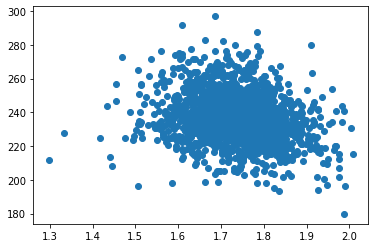

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df.loc[df['Class'] == 'CALI', 'AspectRation'], df.loc[df['Class'] == 'CALI', 'MinorAxisLength'], 
                label = 'CALI')

In [15]:
df[df['Class']=='BOMBAY']

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3349,114004,1279.356,451.361256,323.747996,1.394175,0.696795,115298,380.991340,0.748987,0.988777,0.875280,0.844094,0.003959,0.001240,0.712495,0.993342,BOMBAY
3350,117034,1265.926,425.923788,351.215109,1.212715,0.565722,118019,386.021135,0.746319,0.991654,0.917710,0.906315,0.003639,0.001515,0.821407,0.996132,BOMBAY
3351,126503,1326.959,475.772459,339.381887,1.401879,0.700830,128220,401.333555,0.771313,0.986609,0.902809,0.843541,0.003761,0.001175,0.711561,0.997523,BOMBAY
3352,128118,1360.135,504.024964,325.678447,1.547615,0.763206,129274,403.887242,0.782247,0.991058,0.870274,0.801324,0.003934,0.001001,0.642120,0.993755,BOMBAY
3353,129409,1348.888,484.364424,341.172659,1.419705,0.709831,130688,405.917056,0.799334,0.990213,0.893763,0.838041,0.003743,0.001139,0.702312,0.997076,BOMBAY
3354,129807,1356.314,493.241864,336.464837,1.465954,0.731212,131148,406.540780,0.806315,0.989775,0.886722,0.824222,0.003800,0.001082,0.679342,0.995884,BOMBAY
3355,130070,1362.228,486.706230,343.114783,1.418494,0.709234,131860,406.952414,0.751537,0.986425,0.880820,0.836136,0.003742,0.001128,0.699123,0.991701,BOMBAY
3356,131249,1374.898,521.149246,323.790256,1.609527,0.783572,132831,408.792633,0.814988,0.988090,0.872499,0.784406,0.003971,0.000927,0.615293,0.990331,BOMBAY
3357,131488,1368.233,485.892501,345.621263,1.405852,0.702876,132905,409.164663,0.793368,0.989338,0.882624,0.842089,0.003695,0.001146,0.709114,0.996909,BOMBAY
3358,132254,1358.189,497.767668,339.636342,1.465590,0.731055,133553,410.354752,0.727118,0.990274,0.900945,0.824390,0.003764,0.001072,0.679619,0.996043,BOMBAY


In [24]:
df['AspectRation']

0        1.197191
1        1.097356
2        1.209713
3        1.153638
4        1.060798
5        1.171067
6        1.146768
7        1.165591
8        1.165852
9        1.200834
10       1.157885
11       1.117665
12       1.160455
13       1.178827
14       1.132879
15       1.141582
16       1.168964
17       1.163315
18       1.132851
19       1.177161
20       1.207993
21       1.136756
22       1.171793
23       1.308864
24       1.382816
25       1.092574
26       1.151845
27       1.193691
28       1.205505
29       1.238051
30       1.125107
31       1.225284
32       1.246471
33       1.150241
34       1.120866
35       1.111757
36       1.102633
37       1.110108
38       1.305469
39       1.233820
40       1.143814
41       1.140594
42       1.364864
43       1.230899
44       1.211221
45       1.158103
46       1.195286
47       1.207974
48       1.192041
49       1.187892
50       1.185348
51       1.206954
52       1.157136
53       1.146526
54       1.189512
55       1